In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving step1.png to step1.png


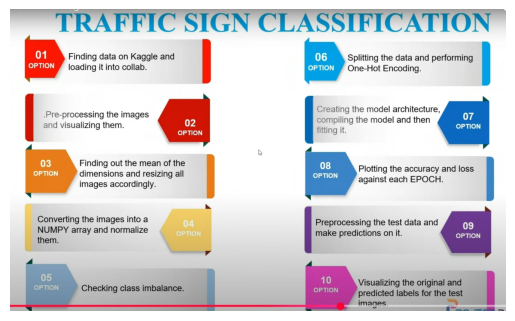

In [4]:
img = Image.open("step1.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [7]:
!pip install -q kaggle

In [8]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [9]:
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [12]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         141328       1205  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          17589        309  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           2203         35  1.0

In [13]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
/content


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [16]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [17]:
ls

 archive.zip        kaggle.json    step1.png
'kaggle (1).json'   sample_data/   traffic_sign_dataset/


In [ ]:
!unzip Traffic_sign_dataset/archive.zip -d traffic_sign_dataset
!rm Traffic_sign_dataset/archive.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

unzip:  cannot find or open Traffic_sign_dataset/archive.zip, Traffic_sign_dataset/archive.zip.zip or Traffic_sign_dataset/archive.zip.ZIP.
rm: cannot remove 'Traffic_sign_dataset/archive.zip': No such file or directory
rm: cannot remove 'traffic_sign_dataset/Meta.csv': No such file or directory


In [18]:
!unzip archive.zip -d traffic_sign_dataset
!rm archive.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
!unzip "archive (14).zip"
!rm "archive (14).zip"
!rm -rf "archive (14)/Meta"
!rm -rf "archive (14)/meta"
!rm -rf "archive (14)/test"
!rm -rf "archive (14)/train"
!rm -rf "archive (14)/Meta.csv"



Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
!unzip "archive (14).zip"
!rm "archive (14).zip"
!rm -rf "traffic_sign_dataset/Meta"
!rm -rf "traffic_sign_dataset/meta"
!rm -rf "traffic_sign_dataset/test"
!rm -rf "traffic_sign_dataset/train"
!rm -rf "traffic_sign_dataset/Meta.csv"

unzip:  cannot find or open archive (14).zip, archive (14).zip.zip or archive (14).zip.ZIP.
rm: cannot remove 'archive (14).zip': No such file or directory


In [ ]:
ls

kaggle.json  Meta.csv      test/     traffic_sign_dataset/  Train.csv
meta/        sample_data/  Test/     train/
Meta/        step1.png     Test.csv  Train/


In [ ]:
!unzip traffic_sign_dataset/archive.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/archive.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

In [ ]:
!unzip "archive (14).zip -d Traffic_sign_dataset"
!rm "archive (14).zip"
!rm -rf "Traffic_sign_dataset/Meta"
!rm -rf "Traffic_sign_dataset/meta"
!rm -rf "Traffic_sign_dataset/test"
!rm -rf "Traffic_sign_dataset/train"
!rm -f "Traffic_sign_dataset/Meta.csv"

unzip:  cannot find or open archive (14).zip -d Traffic_sign_dataset, archive (14).zip -d Traffic_sign_dataset.zip or archive (14).zip -d Traffic_sign_dataset.ZIP.
rm: cannot remove 'archive (14).zip': No such file or directory


In [ ]:
!unzip "Trafficsignrecognitiondataset/archive (14).zip" -d "Trafficsignrecognitiondataset"
!rm "Trafficsignrecognitiondataset/archive (14).zip"
!rm -rf "Trafficsignrecognitiondataset/Meta"
!rm -rf "Trafficsignrecognitiondataset/meta"
!rm -rf "Trafficsignrecognitiondataset/test"
!rm -rf "Trafficsignrecognitiondataset/train"
!rm -f "Trafficsignrecognitiondataset/Meta.csv"


unzip:  cannot find or open Trafficsignrecognitiondataset/archive (14).zip, Trafficsignrecognitiondataset/archive (14).zip.zip or Trafficsignrecognitiondataset/archive (14).zip.ZIP.
rm: cannot remove 'Trafficsignrecognitiondataset/archive (14).zip': No such file or directory


In [ ]:
!ls -R Trafficsignrecognitiondataset


ls: cannot access 'Trafficsignrecognitiondataset': No such file or directory


In [21]:
from matplotlib.pyplot import imread

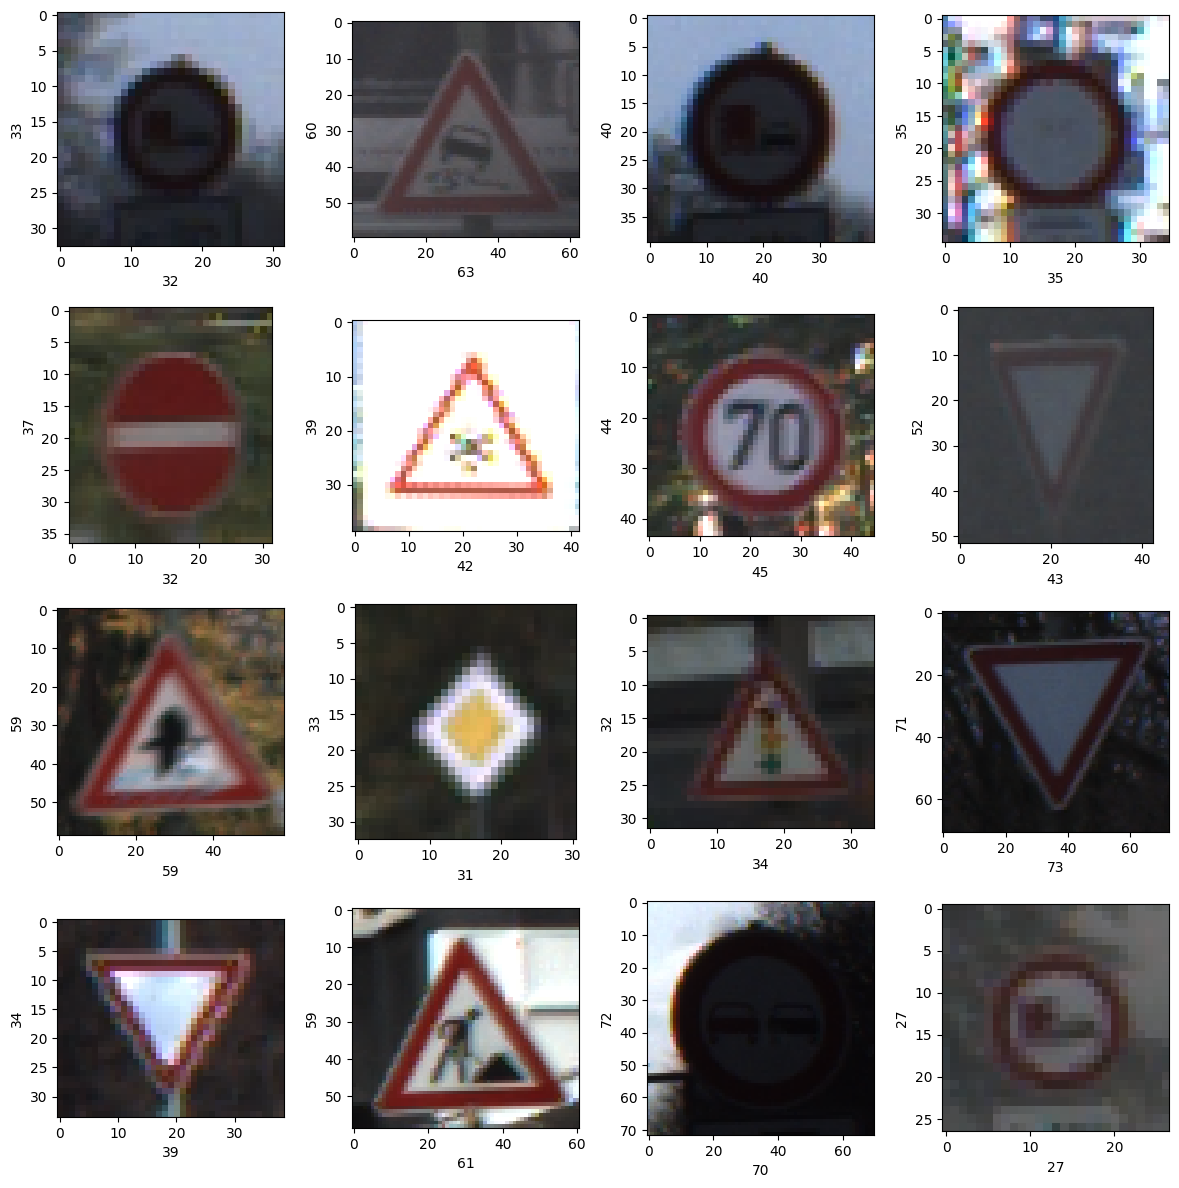

In [22]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [24]:
dim1 = []
dim2 = []

for i in range(0,43):
     labels = "traffic_sign_dataset/Train" + "/{0}".format(i)
     image_path = os.listdir(labels)
     for x in image_path:
         image = imread(labels + "/" + x)
         dim1.append(image.shape[0])
         dim2.append(image.shape[1])

In [25]:
print("Dimension 1 Mean : ",np.mean(dim1),  "Dimesnion 2 Mean : ", np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimesnion 2 Mean :  50.83587951745773


In [28]:
images = []
label_id = []

for i in range(0,43):
     labels = "traffic_sign_dataset/Train" + "/{0}".format(i)
     image_path = os.listdir(labels)
     for x in image_path:
         img = Image.open(labels + "/" + x)
         img = img.resize((50,50))
         img = np.array(img)
         images.append(img)
         label_id.append(i)

In [29]:
images = np.array(images)

images = images/255

In [30]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [31]:
images.shape

(39209, 50, 50, 3)

In [32]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [33]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [34]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [37]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3),  activation = "relu"))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(43, activation = "softmax"))










/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 223s - 908ms/step - accuracy: 0.2716 - loss: 2.6531 - val_accuracy: 0.6299 - val_loss: 1.3903
Epoch 2/10
246/246 - 258s - 1s/step - accuracy: 0.5989 - loss: 1.2803 - val_accuracy: 0.8772 - val_loss: 0.5193
Epoch 3/10
246/246 - 266s - 1s/step - accuracy: 0.7295 - loss: 0.8327 - val_accuracy: 0.9452 - val_loss: 0.3224
Epoch 4/10
246/246 - 261s - 1s/step - accuracy: 0.7883 - loss: 0.6475 - val_accuracy: 0.9552 - val_loss: 0.2143
Epoch 5/10
246/246 - 262s - 1s/step - accuracy: 0.8214 - loss: 0.5462 - val_accuracy: 0.9736 - val_loss: 0.1830
Epoch 6/10
246/246 - 262s - 1s/step - accuracy: 0.8435 - loss: 0.4830 - val_accuracy: 0.9788 - val_loss: 0.1276
Epoch 7/10
246/246 - 260s - 1s/step - accuracy: 0.8578 - loss: 0.4336 - val_accuracy: 0.9810 - val_loss: 0.1113
Epoch 8/10
246/246 - 261s - 1s/step - accuracy: 0.8730 - loss: 0.3844 - val_accuracy: 0.9821 - val_loss: 0.0981
Epoch 9/10
246/246 - 263s - 1s/step - accuracy: 0.8841 - loss: 0.3553 - val_accuracy: 0.9842 - val_lo

<Axes: >

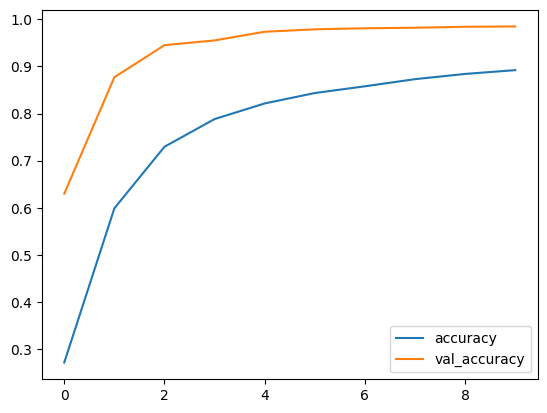

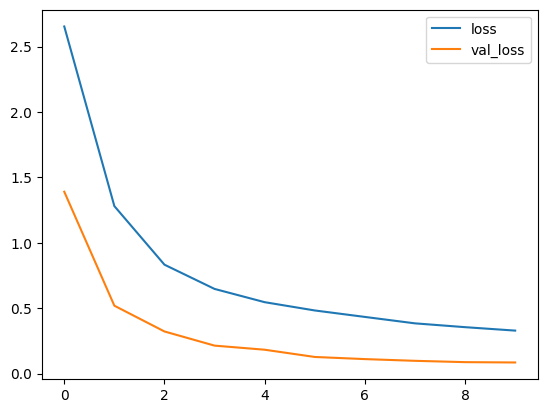

In [40]:
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot()

In [50]:
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + "/" + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)


    images = np.array(images)
    images = images/255

    return images

In [68]:
def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        # Check if the file is an image before opening it
        if x.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
            img = Image.open(test_path + "/" + x)
            img = img.resize((50,50))
            img = np.array(img)
            images.append(img)


    images = np.array(images)
    images = images/255

    return images

In [69]:
test_path = pd.read_csv("traffic_sign_dataset/Test.csv")

In [70]:
test_path2 = "traffic_sign_dataset/Test"

In [71]:
test_images = scaling(sorted(os.listdir(test_path2)),test_path2)

In [72]:
test = pd.read_csv("traffic_sign_dataset/Test.csv")
y_test = test["ClassId"].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [76]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [77]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

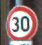

In [78]:
img = Image.open(test_path2 + "/00001.png")
img

In [80]:
print("Original label : ", all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [81]:
print("Predicted label : ", all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


In [75]:
y_pred = model.predict_classes(test_images);
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
import os

path = "train"
if os.path.exists(path):
    import matplotlib.image as mpimg
    import random

    rand_img = mpimg.imread(os.path.join(path, random.choice(sorted(os.listdir(path)))))
    plt.imshow(rand_img)
    plt.axis('off')
    plt.show()
else:
    print(f"Path '{path}' does not exist.")

IsADirectoryError: [Errno 21] Is a directory: 'train/24'

In [ ]:
import cv2
from matplotlib.pyplot import imread

In [ ]:
path = "archive (14)/test"

In [ ]:
import matplotlib.image as mpimg
rand_img = mpimg.imread(path + '/' + random.choice(sorted(os.listdir(path))))


FileNotFoundError: [Errno 2] No such file or directory: 'Trafficsignrecognitiondataset/test'

FileNotFoundError: [Errno 2] No such file or directory: 'archive (14)/Train'

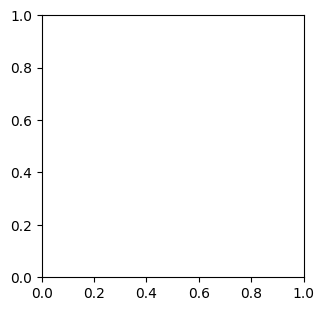

In [ ]:
plt.figure(figsize=(12,12))
path = "archive (14)/Train"
for i in range (1, 17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], frontsize = 10)
    plt.ylabel(rand_img[0], fontsize = 10)